<a href="https://colab.research.google.com/github/yashrajkakkad/ml-spotify/blob/master/SVM_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/Users/ningyuhang/Desktop/EECS545/project/data/data_merged_quartile.csv')
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Minor,Major
0,0.0,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Minor,Major
count,40556.000000,40556.000000,40556.000000,4.055600e+04,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,...,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000,40556.000000
mean,1.453817,0.305996,0.558398,2.454898e+05,0.600334,0.181621,0.193823,-9.126433,0.093739,119.875788,...,0.100084,0.099887,0.099837,0.099665,0.099763,0.101070,0.099541,0.100528,0.639757,0.360243
std,1.107851,0.341117,0.178648,1.101264e+05,0.264509,0.325721,0.161508,6.154880,0.101506,30.653724,...,0.300115,0.299852,0.299787,0.299556,0.299688,0.301425,0.299391,0.300706,0.480077,0.480077
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020000,0.442000,1.904800e+05,0.433000,0.000000,0.097000,-10.843000,0.036100,94.893000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.144000,0.569000,2.275265e+05,0.644000,0.000157,0.126000,-7.277000,0.048900,119.755500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,0.550000,0.687000,2.757600e+05,0.817000,0.152000,0.244000,-5.174000,0.098800,140.344250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
len(df.columns), df.columns

(35,
 Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
        'valence', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
        'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'genre_0',
        'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6',
        'genre_7', 'genre_8', 'genre_9', 'Minor', 'Major'],
       dtype='object'))

In [5]:

y_popl = pd.concat([pd.Series(df['popularity'], name="popularity")], axis=1)

y = y_popl["popularity"].values

In [7]:
drop_cols = ["popularity", "loudness"]
X = df.drop(drop_cols, axis=1).values


In [8]:
X.shape, y.shape

((40556, 33), (40556,))

1
10
20
30
60
80
100


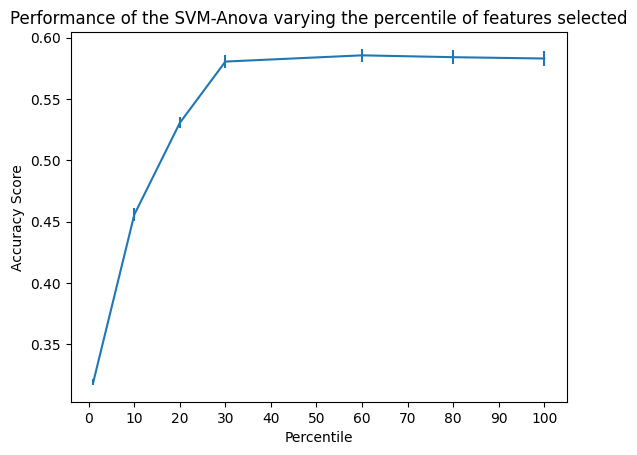

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
import matplotlib.pyplot as plt

# ANOVA can be used as a feature selection technique to identify the most relevant features 
# for a given task by analyzing the relationship between each feature and the target variable


clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
# #############################################################################
# Plot the cross-validation score as a function of percentile of features

# selects the top n% of features for ANOVA

score_means = list()
score_stds = list()
percentiles = (1, 10, 20, 30, 60, 80, 100)

for percentile in percentiles:
    print(percentile)
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X_train, y_train)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [11]:
print(score_means)

[0.31916522298287586, 0.4557083228584312, 0.5306064336516374, 0.5805693130687444, 0.5856549754407487, 0.584144646569676, 0.5830658836665445]


In [23]:
from sklearn.feature_selection import SelectPercentile, chi2
X = SelectPercentile(chi2, percentile=10).fit_transform(X, y)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

(40556, 4)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [25]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Set the parameters by cross-validation
tuned_parameters = [
#                         'kernel': ['rbf'], 
#                         'gamma': [1e-3, 1e-4],
#                         'C': [1, 10, 100, 1000]
#                     },
                    {
                        'kernel': ['linear'],
                        'C': [1000, 1e4]
                    }]

scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s' % score
    )
    clf.fit(X_train[:10000], y_train[:10000])

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_true, y_pred))
    print()

# svm = LinearSVC(random_state=42, tol=1e-5, max_iter=10000)
# svm.fit(X_train[:50000], y_train[:50000])
# # print("Train accuracy of svm algo:", svm.score(X_train, y_train))
# # print("Test accuracy of svm algo:", svm.score(X_test, y_test))


# cv_scores = cross_val_score(svm, X_train[:100000], y_train[:100000], cv=3)
# print("Cross Validation scores - ", cv_scores)

# y_train_pred = cross_val_predict(svm, X_train[:100000], y_train[:100000])

# confusion_matrix = confusion_matrix(y_train[:100000], y_train_pred)
# print("Confusion matrix\n", confusion_matrix)

# p_score = precision_score(y_train[:100000], y_train_pred)
# rc_score = recall_score(y_train[:100000], y_train_pred)
# f1_score = f1_score(y_train[:100000], y_train_pred)
# p_score, rc_score, f1_score
# print("Recall score = ", rc_score)
# print("Precision score = ", p_score)
# print("F1 score = ", f1_score)

# print("Classification report\n")
# print(classification_report(y_train[:100000], y_train_pred))

# Tuning hyper-parameters for recall



/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_